In [1]:
import numpy as np
import pandas as pd
from os import listdir
import random
random.seed()   
import sklearn.mixture as mix
import talib
import matplotlib.pyplot as plt
from matplotlib import cm
import time
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from hmmlearn import hmm
np.random.seed(42)
from sklearn.externals import joblib

# Load data from Reuters

In [2]:
import TALIB
try:
    import eikon as ek
    ek.set_app_id('604ea22425e048d39af0ef760ec9c64ebbe1fe68')
    startdate='1000-01-20T15:04:05'
    current_date=time.strftime("%Y-%m-%d")

#     TTF=ek.get_timeseries('TFMBYc1',start_date=startdate,end_date=current_date)
    TTF = data = TALIB.getX('TFMBYc1')
except:
    TTF=pd.read_csv('data.csv',decimal=',',delimiter=';')
display(TTF)
   
TTF = TTF.rename(columns={'CLOSE':'TTF_CLOSE'})
TTF = TTF.dropna(subset=['TTF_CLOSE'])
TTF = TTF.rename(columns={'HIGH':'TTF_HIGH'})
TTF = TTF.dropna(subset=['TTF_HIGH'])
TTF = TTF.rename(columns={'LOW':'TTF_LOW'})
TTF = TTF.dropna(subset=['TTF_LOW'])
TTF = TTF.rename(columns={'OPEN':'TTF_OPEN'})
TTF = TTF.dropna(subset=['TTF_OPEN'])
TTF = TTF.rename(columns={'VOLUME':'TTF_VOLUME'})
TTF = TTF.fillna(0)
# display(TTF) 
########################MOMENTUM INDICATORS###############################################################
TTF['TTF_ADX'] = talib.ADX(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'], 14).astype(float)
TTF['TTF_ADXR'] = talib.ADXR(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'], 14).astype(float)
TTF['TTF_APO'] = talib.APO(TTF['TTF_CLOSE'], 12,26,0).astype(float)
TTF['TTF_AROON_DOWN'] = talib.AROON(TTF['TTF_HIGH'],TTF['TTF_LOW'],14)[0].astype(float)
TTF['TTF_AROON_UP'] = talib.AROON(TTF['TTF_HIGH'],TTF['TTF_LOW'],14)[1].astype(float)
TTF['TTF_AROONOSC'] = talib.AROONOSC(TTF['TTF_HIGH'],TTF['TTF_LOW'],14).astype(float)
TTF['TTF_BOP'] = talib.BOP(TTF['TTF_OPEN'],TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE']).astype(float)
TTF['TTF_CCI'] = talib.CCI(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'], 14).astype(float)
TTF['TTF_CMO'] = talib.CMO(TTF['TTF_CLOSE'],14).astype(float)
TTF['TTF_DX'] = talib.DX(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'], 14).astype(float)
TTF['TTF_MACD'] = talib.MACD(TTF['TTF_CLOSE'], 12, 26, 9)[0].astype(float)
TTF['TTF_MACDSIGNALS'] = talib.MACD(TTF['TTF_CLOSE'], 12, 26, 9)[1].astype(float)
TTF['TTF_MACDHIST'] = talib.MACD(TTF['TTF_CLOSE'], 12, 26, 9)[0].astype(float)
TTF['TTF_MFI'] = talib.MFI(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],TTF['TTF_VOLUME'], 14).astype(float)
TTF['TTF_MINUS_DI'] = talib.MINUS_DI(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'], 14).astype(float)
TTF['TTF_MINUS_DM'] = talib.MINUS_DM(TTF['TTF_HIGH'],TTF['TTF_LOW'],14).astype(float)
TTF['TTF_MOM'] = talib.MOM(TTF['TTF_CLOSE'],14).astype(float)
TTF['TTF_PLUS_DI'] = talib.PLUS_DI(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'], 14).astype(float)
TTF['TTF_PLUS_DM'] = talib.PLUS_DM(TTF['TTF_HIGH'],TTF['TTF_LOW'], 14).astype(float)
TTF['TTF_PPO'] = talib.PPO(TTF['TTF_CLOSE'], 12, 26).astype(float)
TTF['TTF_ROC'] = talib.ROC(TTF['TTF_CLOSE'], 10).astype(float)
TTF['TTF_ROCP'] = talib.ROCP(TTF['TTF_CLOSE'], 10).astype(float)
TTF['TTF_ROCR'] = talib.ROCR(TTF['TTF_CLOSE'], 10).astype(float)
TTF['TTF_ROCR100'] = talib.ROCR100(TTF['TTF_CLOSE'], 10).astype(float)
TTF['TTF_RSI'] = talib.RSI(TTF['TTF_CLOSE'],14).astype(float)
TTF['TTF_SLOWK'] = talib.STOCH(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],5,3,0,3,0)[0].astype(float)
TTF['TTF_SLOWD'] = talib.STOCH(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],5,3,0,3,0)[1].astype(float)
TTF['TTF_FASTK'] = talib.STOCHF(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],5,3,0)[0].astype(float)
TTF['TTF_FASTD'] = talib.STOCHF(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],5,3,0)[1].astype(float)
TTF['TTF_STOCHRSI0'] = talib.STOCHRSI(TTF['TTF_CLOSE'],14,5,3,0)[0].astype(float)
TTF['TTF_STOCHRSI1'] = talib.STOCHRSI(TTF['TTF_CLOSE'],14,5,3,0)[1].astype(float)
TTF['TTF_TRIX'] = talib.TRIX(TTF['TTF_CLOSE'],30).astype(float)
TTF['TTF_ULTOSC'] = talib.ULTOSC(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],7,14,28).astype(float)
TTF['TTF_WILLR'] = talib.WILLR(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],14).astype(float)
########################MOMENTUM INDICATORS###############################################################

########################VOLUME INDICATORS###############################################################
TTF['TTF_AD'] = talib.AD(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],TTF['TTF_VOLUME']).astype(float)
TTF['TTF_ADOSC'] = talib.ADOSC(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],TTF['TTF_VOLUME'],3,10).astype(float)
TTF['TTF_OBV'] = talib.OBV(TTF['TTF_CLOSE'],TTF['TTF_VOLUME']).astype(float)
########################VOLUME INDICATORS###############################################################

########################VOLATILITY INDICATORS###############################################################
TTF['TTF_ATR'] = talib.ATR(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],14).astype(float)
TTF['TTF_NATR'] = talib.NATR(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE'],14).astype(float)
TTF['TTF_TRANGE'] = talib.TRANGE(TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE']).astype(float)
########################VOLATILITY INDICATORS###############################################################

########################CYCLE INDICATORS###############################################################
TTF['TTF_HT_DCPERIOD'] = talib.HT_DCPERIOD(TTF['TTF_CLOSE']).astype(float)
TTF['TTF_HT_DCPHASE'] = talib.HT_DCPHASE(TTF['TTF_CLOSE']).astype(float)
TTF['TTF_HT_PHASOR_0'] = talib.HT_PHASOR(TTF['TTF_CLOSE'])[0].astype(float)
TTF['TTF_HT_PHASOR_1'] = talib.HT_PHASOR(TTF['TTF_CLOSE'])[1].astype(float)
TTF['TTF_HT_SINE_0'] = talib.HT_SINE(TTF['TTF_CLOSE'])[0].astype(float)
TTF['TTF_HT_SINE_1'] = talib.HT_SINE(TTF['TTF_CLOSE'])[1].astype(float)
TTF['TTF_HT_TRENDMODE'] = talib.HT_TRENDMODE(TTF['TTF_CLOSE']).astype(float)
########################CYCLE INDICATORS###############################################################

########################PATTERN RECOGNITION###############################################################
TTF['TTF_CDL2CROWS'] = talib.CDL2CROWS(TTF['TTF_OPEN'],TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE']).astype(float)
TTF['TTF_CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(TTF['TTF_OPEN'],TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE']).astype(float)
TTF['TTF_CDL3INSIDE'] = talib.CDL3INSIDE(TTF['TTF_OPEN'],TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE']).astype(float)
TTF['TTF_CDL3OUTSIDE'] = talib.CDL3OUTSIDE(TTF['TTF_OPEN'],TTF['TTF_HIGH'],TTF['TTF_LOW'],TTF['TTF_CLOSE']).astype(float)
########################PATTERN RECOGNITION###############################################################


# display(TTF)

brent=ek.get_timeseries('LCOc12',start_date=startdate,end_date=current_date) 
brent = brent.rename(columns={'CLOSE':'brent_CLOSE'})
brent = brent.dropna(subset=['brent_CLOSE'])
brent['brent_RSI'] = talib.RSI(brent['brent_CLOSE'],14).astype(float)
# display(brent)

coal=ek.get_timeseries('TRAPI2Yc1',start_date=startdate,end_date=current_date)
coal = coal.rename(columns={'CLOSE':'coal_CLOSE'})
coal = coal.dropna(subset=['coal_CLOSE'])
# display(coal)
coal['coal_RSI'] = talib.RSI(coal['coal_CLOSE'],14).astype(float)
# display(coal)

CO2=ek.get_timeseries('CFI2c12',start_date=startdate,end_date=current_date)
CO2 = CO2.rename(columns={'CLOSE':'CO2_CLOSE'})
CO2 = CO2.dropna(subset=['CO2_CLOSE'])
CO2['CO2_RSI'] = talib.RSI(CO2['CO2_CLOSE'],14).astype(float)
# display(CO2)

data = pd.merge(pd.DataFrame(TTF['TTF_RSI']), pd.DataFrame(brent['brent_RSI']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(coal['coal_RSI']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(CO2['CO2_RSI']), how = 'inner', left_index=True, right_index=True)

data = pd.merge(data, pd.DataFrame(TTF['TTF_CLOSE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(brent['brent_CLOSE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(coal['coal_CLOSE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(CO2['CO2_CLOSE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ADX']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ADXR']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_CCI']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_DX']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_CMO']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_APO']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_AROON_DOWN']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_AROON_UP']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_AROONOSC']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_BOP']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_MACDSIGNALS']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_MACDHIST']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_MFI']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_MINUS_DI']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_MINUS_DM']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_MOM']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_PLUS_DI']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_PLUS_DM']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_PPO']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ROC']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ROCP']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ROCR']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ROCR100']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_SLOWK']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_SLOWD']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_FASTK']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_FASTD']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_STOCHRSI0']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_STOCHRSI1']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_TRIX']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ULTOSC']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ULTOSC']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ULTOSC']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_WILLR']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_AD']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ADOSC']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_OBV']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_ATR']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_NATR']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_TRANGE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_HT_DCPERIOD']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_HT_DCPHASE']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_HT_PHASOR_0']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_HT_PHASOR_1']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_HT_SINE_0']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_HT_SINE_1']), how = 'inner', left_index=True, right_index=True)
data = pd.merge(data, pd.DataFrame(TTF['TTF_HT_TRENDMODE']), how = 'inner', left_index=True, right_index=True)

data = pd.merge(data, pd.DataFrame(TTF['TTF_CDL3OUTSIDE']), how = 'inner', left_index=True, right_index=True)

select = data.ix[:].dropna()
data = data.dropna()

data['brent_Corr'] = data['TTF_CLOSE'].rolling(20).corr(data['brent_CLOSE'])
data['coal_Corr'] = data['TTF_CLOSE'].rolling(20).corr(data['coal_CLOSE'])
data['CO2_Corr'] = data['TTF_CLOSE'].rolling(20).corr(data['CO2_CLOSE'])
data = data.dropna()

X =  data[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE']].values
display(X[100:1000])
# X =  data[['TTF_CCI']].values
# data = pd.merge(data, pd.DataFrame(TTF['TTF_CLOSE']), how = 'inner', left_index=True, right_index=True)
display(data)
data.to_csv('data.csv')
    

,TTF_CLOSE,TTF_RSI,TTF_ADX,TTF_ADXR,TTF_CCI,TTF_DX,TTF_CMO,TTF_APO,TTF_AROON_DOWN,TTF_AROON_UP,...,TTF_NATR,TTF_TRANGE,TTF_HT_DCPERIOD,TTF_HT_DCPHASE,TTF_HT_PHASOR_0,TTF_HT_PHASOR_1,TTF_HT_SINE_0,TTF_HT_SINE_1,TTF_HT_TRENDMODE,TTF_CDL3OUTSIDE
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-19,27.282,59.545020,18.057498,16.177255,44.781391,17.563924,19.090040,0.735077,0.000000,71.428571,...,0.951571,0.261,23.813464,136.868550,1.158844,-0.619985,0.683674,-0.032607,1.0,0.0
2012-11-08,27.217,58.540028,18.181721,15.843036,42.356652,19.796614,17.080055,0.793840,0.000000,64.285714,...,0.903558,0.068,24.809247,142.384735,0.912244,-1.332397,0.610356,-0.128531,1.0,0.0
2012-11-12,27.368,60.219734,18.297070,15.665384,41.153633,19.796614,20.439467,0.838340,0.000000,57.142857,...,0.869101,0.133,25.293116,153.519113,0.479244,-2.024680,0.445899,-0.317621,1.0,0.0
2012-11-27,27.284,58.792763,18.271869,15.346752,25.032743,17.944246,17.585525,0.880064,7.142857,50.000000,...,0.827309,0.068,25.409655,164.166122,-0.182716,-1.895085,0.272849,-0.487343,1.0,0.0
2012-12-17,27.123,56.051234,17.722364,15.023050,-24.476295,10.578797,12.102468,0.881410,0.000000,42.857143,...,0.821232,0.184,25.690290,173.686292,-0.608604,-0.617291,0.109972,-0.625056,1.0,0.0
2012-12-19,27.096,55.583138,17.317722,14.790922,-38.533453,12.057383,11.166277,0.827417,0.000000,35.714286,...,0.770450,0.027,26.301642,183.345307,-0.470881,0.561303,-0.058353,-0.747164,1.0,0.0
2013-01-31,26.390,45.000532,16.906760,14.914721,-240.207676,11.564249,-9.998936,0.706314,100.000000,28.571429,...,0.922940,0.696,26.571510,193.487595,-0.163761,0.769865,-0.233235,-0.852527,0.0,-100.0
2013-04-04,27.042,53.756902,16.097919,15.212549,-73.724774,5.582994,7.513803,0.598128,92.857143,21.428571,...,0.997478,0.610,26.221235,203.100867,0.035572,0.530349,-0.392351,-0.927842,0.0,0.0
2013-04-09,26.688,49.178815,15.298779,15.492940,-144.259584,4.909958,-1.642370,0.455385,85.714286,14.285714,...,1.056813,0.442,25.508250,217.801732,0.136632,-0.307864,-0.612931,-0.992118,0.0,0.0


KeyError: ['TTF_HIGH']

# train model with optimal number of hidden states

In [3]:
data_train = data[:1000]
data_test = data[1001:]

X_train =  data_train[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE']].values
X_test =  data_test[['TTF_CCI','TTF_ROC','TTF_ROCP','TTF_ROCP','TTF_ROCR100','TTF_ATR','TTF_HT_TRENDMODE']].values

model = hmm.GaussianHMM(n_components=2, n_iter=10000).fit(X_train)

hidden_states=model.predict(X_test)
print(hidden_states)
########################################################################### HMM #####################################
data_test['HMM_TTF'] = hidden_states
# print(model.converged_)
display(data)

from sklearn.externals import joblib
# now you can save it to a file
joblib.dump(model, 'HMM.pkl') 
# and later you can load it


[1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1]


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,TTF_CLOSE,TTF_RSI,TTF_ADX,TTF_ADXR,TTF_CCI,TTF_DX,TTF_CMO,TTF_APO,TTF_AROON_DOWN,TTF_AROON_UP,...,TTF_NATR,TTF_TRANGE,TTF_HT_DCPERIOD,TTF_HT_DCPHASE,TTF_HT_PHASOR_0,TTF_HT_PHASOR_1,TTF_HT_SINE_0,TTF_HT_SINE_1,TTF_HT_TRENDMODE,TTF_CDL3OUTSIDE
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-19,27.282,59.545020,18.057498,16.177255,44.781391,17.563924,19.090040,0.735077,0.000000,71.428571,...,0.951571,0.261,23.813464,136.868550,1.158844,-0.619985,0.683674,-0.032607,1.0,0.0
2012-11-08,27.217,58.540028,18.181721,15.843036,42.356652,19.796614,17.080055,0.793840,0.000000,64.285714,...,0.903558,0.068,24.809247,142.384735,0.912244,-1.332397,0.610356,-0.128531,1.0,0.0
2012-11-12,27.368,60.219734,18.297070,15.665384,41.153633,19.796614,20.439467,0.838340,0.000000,57.142857,...,0.869101,0.133,25.293116,153.519113,0.479244,-2.024680,0.445899,-0.317621,1.0,0.0
2012-11-27,27.284,58.792763,18.271869,15.346752,25.032743,17.944246,17.585525,0.880064,7.142857,50.000000,...,0.827309,0.068,25.409655,164.166122,-0.182716,-1.895085,0.272849,-0.487343,1.0,0.0
2012-12-17,27.123,56.051234,17.722364,15.023050,-24.476295,10.578797,12.102468,0.881410,0.000000,42.857143,...,0.821232,0.184,25.690290,173.686292,-0.608604,-0.617291,0.109972,-0.625056,1.0,0.0
2012-12-19,27.096,55.583138,17.317722,14.790922,-38.533453,12.057383,11.166277,0.827417,0.000000,35.714286,...,0.770450,0.027,26.301642,183.345307,-0.470881,0.561303,-0.058353,-0.747164,1.0,0.0
2013-01-31,26.390,45.000532,16.906760,14.914721,-240.207676,11.564249,-9.998936,0.706314,100.000000,28.571429,...,0.922940,0.696,26.571510,193.487595,-0.163761,0.769865,-0.233235,-0.852527,0.0,-100.0
2013-04-04,27.042,53.756902,16.097919,15.212549,-73.724774,5.582994,7.513803,0.598128,92.857143,21.428571,...,0.997478,0.610,26.221235,203.100867,0.035572,0.530349,-0.392351,-0.927842,0.0,0.0
2013-04-09,26.688,49.178815,15.298779,15.492940,-144.259584,4.909958,-1.642370,0.455385,85.714286,14.285714,...,1.056813,0.442,25.508250,217.801732,0.136632,-0.307864,-0.612931,-0.992118,0.0,0.0


['HMM.pkl']

C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['courier prime code'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


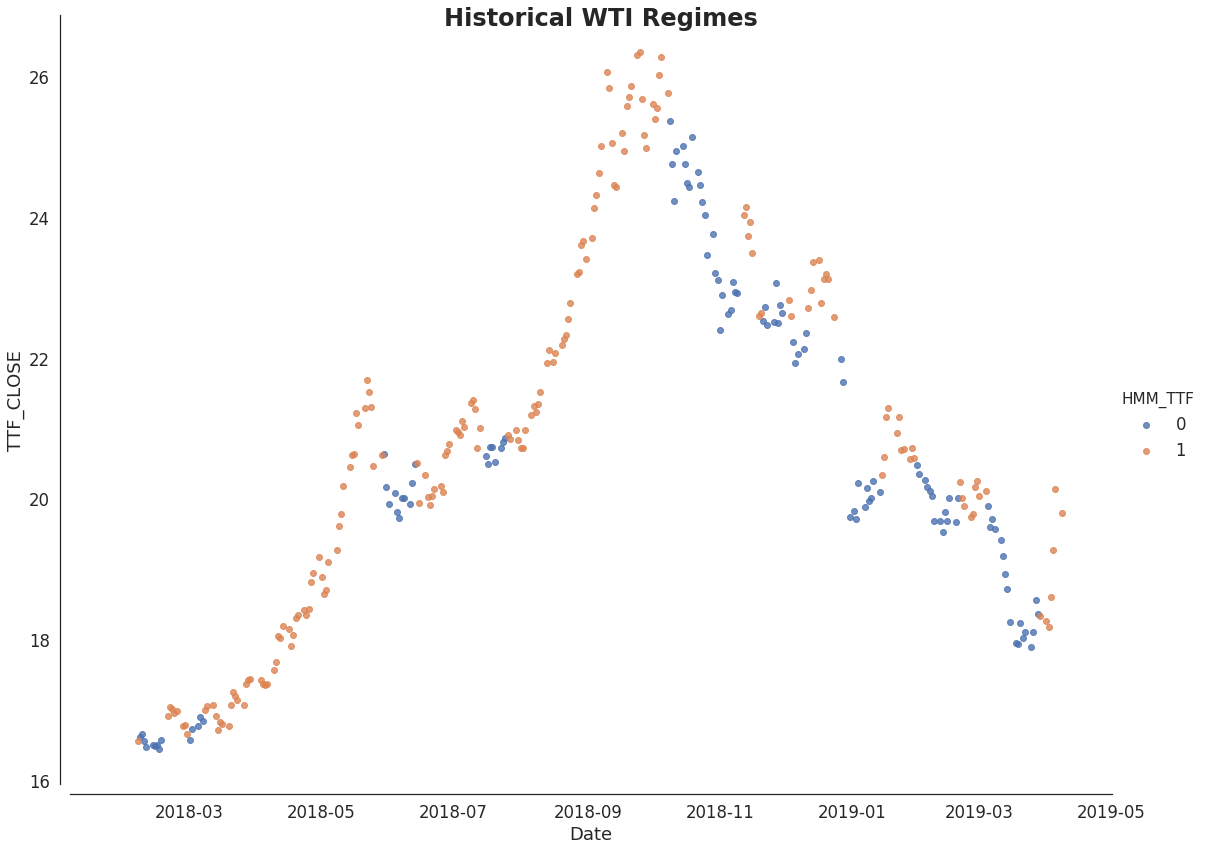

In [4]:
style_kwds = {'xtick.major.size': 1, 'ytick.major.size': 1,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set(font_scale=1.5)

states = (pd.DataFrame(data, columns=['states'],index=data_test.index).join(data_test, how='inner')
          .reset_index(drop=False)
          )
# print(data.index)
# display(states)
sns.set_style('white', style_kwds)
order = [0,1]
# order = range(6)
fg = sns.FacetGrid(data=states, hue='HMM_TTF', hue_order=order,
                    aspect=1.31, size=12)
fg.map(plt.scatter, 'Date', 'TTF_CLOSE', alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical WTI Regimes', fontsize=24, fontweight='demi')
fg.savefig('Hidden Markov (Mixture) Model_SPY Regimes.png')

# Test it!

In [5]:
returns = ((data_test['TTF_CLOSE'] - data_test['TTF_CLOSE'].shift(10))<0)*1
# print(TTF['TTF_CLOSE'],returns)
score = max(sum(returns == hidden_states),len(returns)-sum(returns == hidden_states))/float(len(returns))
print(score)
print(len(returns),len(hidden_states),len(TTF['TTF_CLOSE']))

0.925925925926
297 297 1298


# Use it!

In [6]:
model = joblib.load('HMM.pkl')
hidden_states = []
for i in range(0,len(X)):
    try:
        hidden_states.append(model.predict(X[i-100:i])[-1])
#         print(model.predict(X[i-1:i]))
    except:
        hidden_states.append(0)
data['HMM_TTF'] = hidden_states
print(len(hidden_states))
# display(hidden_states)
# print(max(hidden_states))

NameError: name 'X' is not defined

In [ ]:
style_kwds = {'xtick.major.size': 1, 'ytick.major.size': 1,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set(font_scale=1.5)

states = (pd.DataFrame(data, columns=['states'],index=data.index).join(data, how='inner')
          .reset_index(drop=False)
          )
# print(data.index)
# display(states)
sns.set_style('white', style_kwds)
# order = [0,1]
order = range(2)
fg = sns.FacetGrid(data=states, hue='HMM_TTF', hue_order=order,
                    aspect=1.31, size=12)
fg.map(plt.scatter, 'Date', 'TTF_CLOSE', alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical WTI Regimes', fontsize=24, fontweight='demi')
fg.savefig('Hidden Markov (Mixture) Model_SPY Regimes.png')